# OPTIONAL notebook 

## 1. Dataframes et package Pandas

 We can open the `iris` file to obtain a dataframe. To manipulate dataframes, we need the `pandas` package.

In [31]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris=datasets.load_iris(as_frame=True)

In [2]:
X=iris.data
y=iris.target
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

X is a dataframe and y is a series.

To answer the following questions, you can use this tutorial:  https://pandas.pydata.org/docs/user_guide/10min.html

**Question 1** Use some functions described in the tutorial to get information about the dataframe X and the series y.
Specifically, display the types of explanatory variables, the names of explanatory variables, and the number of flowers in each category (setosa, versicolor and virginica) in `y`.  

In [3]:
# informations about the dataframe X

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [4]:
# informations about the dataframe X

print(y.info())
print("\n")
for k,type in enumerate(iris.target_names):
    print(f"Number of {type} is {y.value_counts()[k].item()}") 

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB
None


Number of setosa is 50
Number of versicolor is 50
Number of virginica is 50


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
predictions=knn_clf.predict(X_test)

**Question 2** Display the confusion matrix related to  test data (X_test,y_test), see https://en.wikipedia.org/wiki/Confusion_matrix 
Compute the accuracy score using this matrix. 

In [6]:
M = np.zeros((3,3))

for i,j in zip(predictions,y_test):
    if i==j:
        M[i][j]+=1
    else:
        M[i][j]+=1
    
print(M)

[[19.  0.  0.]
 [ 0. 15.  1.]
 [ 0.  0. 15.]]


In [7]:
print(f"Accuracy is {np.diag(M).sum()/M.sum() * 100}%")

Accuracy is 98.0%


**Question 3** Display the accuracy score directly (without the confusing matrix). 

In [8]:
print(f"Accuracy is {knn_clf.score(X_test,y_test) * 100}%")

Accuracy is 98.0%


**Question 4** Display the number of individuals for each label in the series `y_test` and observe that the distribution is not uniform across labels, unlike in the original `y` data.

In [9]:
for k,type in enumerate(iris.target_names):
    print(f"Proportion of {type} in y_test is {y_test.value_counts()[k].item() / y_test.shape[0] * 100}% and in y it is {np.round(y.value_counts()[k].item() / y.shape[0] * 100,2)}%")
 

Proportion of setosa in y_test is 38.0% and in y it is 33.33%
Proportion of versicolor in y_test is 30.0% and in y it is 33.33%
Proportion of virginica in y_test is 32.0% and in y it is 33.33%


**Question 5** Use the `stratify` parameter in `train_test_split` to create a new split into training and test samples, ensuring that the distribution of each label in the test sample matches that of the initial sample (i.e., in this case, an equal number of individuals with labels y=0, y=1, and y=2). (Verify the result)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42,stratify=y)

In [11]:
for k,type in enumerate(iris.target_names):
    print(f"Proportion of {type} in y_test is {y_test.value_counts()[k].item() / y_test.shape[0] * 100}% and in y it is {np.round(y.value_counts()[k].item() / y.shape[0] * 100,2)}%")


Proportion of setosa in y_test is 32.0% and in y it is 33.33%
Proportion of versicolor in y_test is 34.0% and in y it is 33.33%
Proportion of virginica in y_test is 34.0% and in y it is 33.33%


# 3.Dataframes and graphs

We will use a new dataset called housing.

This dataset includes features such as population, median income, and median house price for each geographic unit (with a population of 600 to 3,000 people). In this case, the individuals (or data points) essentially represent neighborhoods.

In [12]:
housing=pd.read_csv('housing.csv')

**Question 6** Display the main information about the housing dataset. Notice that there are missing data. What is the type of each column?

In [25]:
print(f"Number of not missing data : {housing.isna().value_counts()[0]}")
print(f"Numbres of missing data : {housing.isna().value_counts()[1]}")

print("\n")
for k in range(0,housing.shape[1]):
    print(f"Type of the columns \"{housing.columns.to_numpy()[k]}\" is {housing.dtypes.to_numpy()[k]}")

Number of not missing data : 20433
Numbres of missing data : 207


Type of the columns "longitude" is float64
Type of the columns "latitude" is float64
Type of the columns "housing_median_age" is float64
Type of the columns "total_rooms" is float64
Type of the columns "total_bedrooms" is float64
Type of the columns "population" is float64
Type of the columns "households" is float64
Type of the columns "median_income" is float64
Type of the columns "median_house_value" is float64
Type of the columns "ocean_proximity" is object


C:\Users\Antonin\AppData\Local\Temp\ipykernel_12948\895513762.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of not missing data : {housing.isna().value_counts()[0]}")
C:\Users\Antonin\AppData\Local\Temp\ipykernel_12948\895513762.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Numbres of missing data : {housing.isna().value_counts()[1]}")


We can try to predict the variable `median_house_values` based on all other variables. 

We'll start with a geographical visualization of the data: (these are California data)

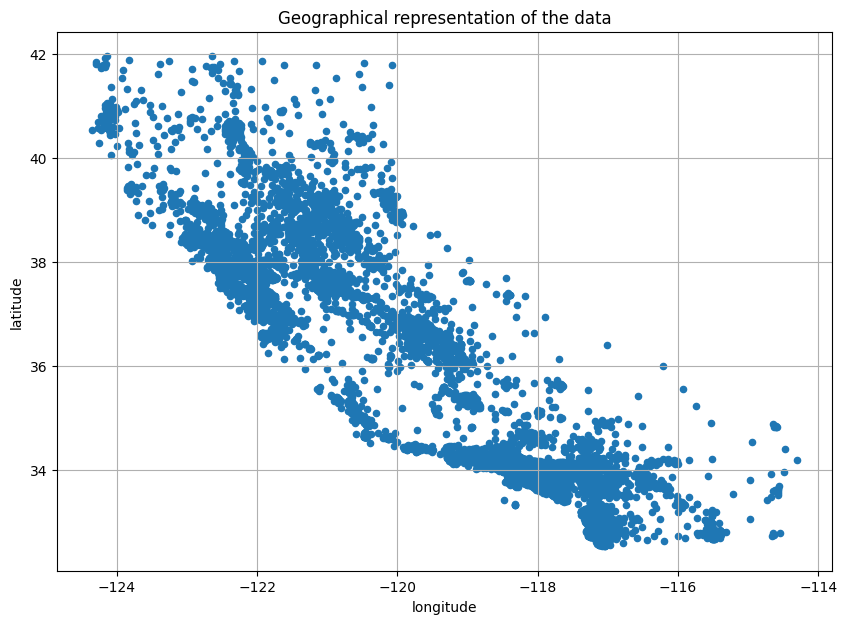

In [59]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,figsize=(10,7),title="Geographical representation of the data")
plt.show()

**Question 7** Use a transparency argument  to better visualize areas with high density.

<details> 
    <summary> Hint
        </summary> use the `alpha` parameter. 
        </details>
        
        

In [1]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.3,figsize=(10,7),title="Geographical representation of the data")
plt.show()

NameError: name 'housing' is not defined

**Question 8** Make the points, which are meant to represent neighborhoods, have a size proportional to the neighborhood's population and vary in color according to the median_house_value of the neighborhood. Display the legend and the colorbar. You can use the following example as a guide: https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

Hint: Use the population divided by 100 for the point sizes.


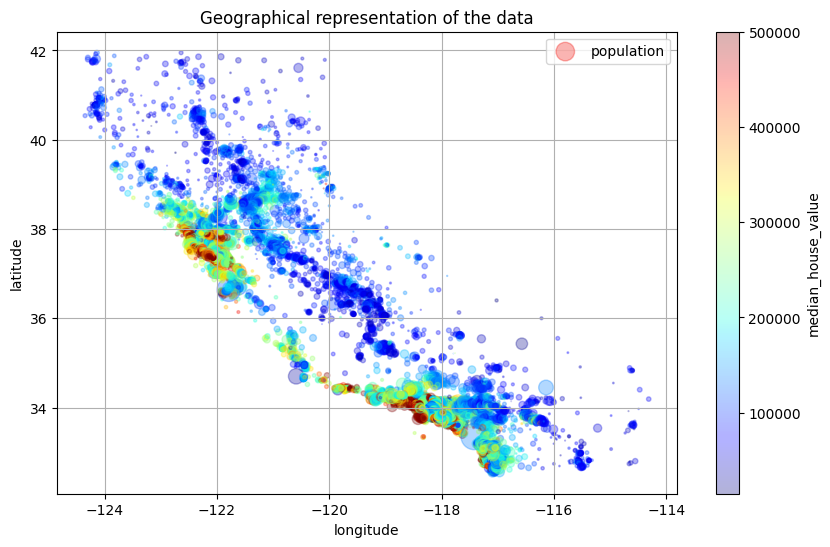

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.3,s=housing["population"]/100,label="population",
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,figsize=(10,6),title="Geographical representation of the data")
plt.show()

We can display scatter plots for all pairs of columns in a dataframe using the `scatter_matrix` function from the `pandas.plotting` package. Since there are 11 columns, we won't represent all 11^2=121 corresponding graphs, but only a few of them. 

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

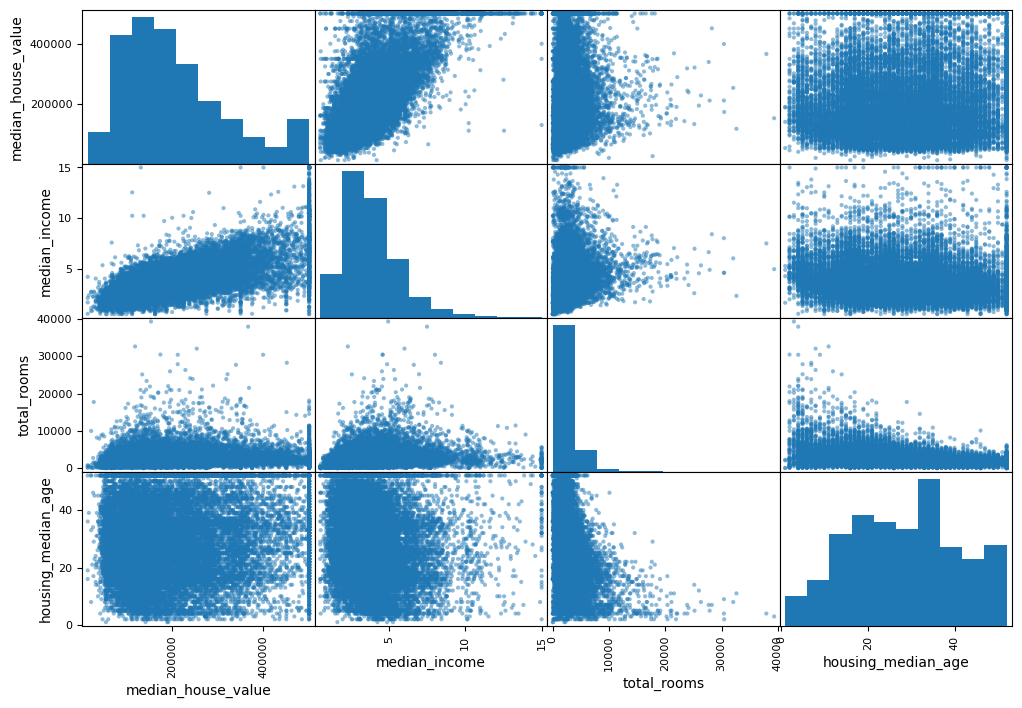

In [ ]:
from pandas.plotting import scatter_matrix
attributes= ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

Looking at the diagonal, we can see the histograms for each column. By examining these graphs, it appears that the variable most correlated with median_house_value is median_income.

**Question 9** Display the correlations between the target median_house_value and the other variables, in descending order. For the correlation matrix, use `housing.corr`. 

In [55]:
housing.corr(method='pearson', min_periods=1, numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## 3. Extra exercises on pandas

Many exercises here : https://github.com/guipsamora/pandas_exercises/tree/master
(with  solutions). 